Considere um experimento em que se analisa a octanagem da gasolina em função da adição de um novo aditivo. Para isso, foram realizados ensaios com os percentuais de 1, 2, 3, 4, 5 e 6% de aditivo. Os resultados são mostrados a seguir:

|X|1   |2   |3   |4   |5   |6 |
|-|----|----|----|----|----|--|
|Y|80,5|81,6|82,1|83,7|83,9|85|

In [1]:
import numpy as np
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([[80.5], [81.6], [82.1], [83.7], [83.9], [85]])

In [2]:
X

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [3]:
y

array([[80.5],
       [81.6],
       [82.1],
       [83.7],
       [83.9],
       [85. ]])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [5]:
X

array([[-1.46385011],
       [-0.87831007],
       [-0.29277002],
       [ 0.29277002],
       [ 0.87831007],
       [ 1.46385011]])

In [6]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [7]:
y

array([[-1.50141978],
       [-0.78334945],
       [-0.45695385],
       [ 0.58751209],
       [ 0.71807033],
       [ 1.43614066]])

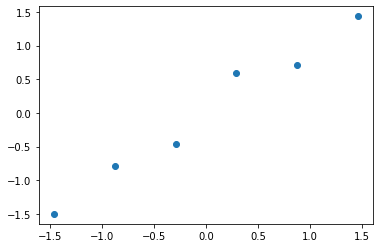

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

# Fórmula da regressão linear simples
y = b0 + b1 * x

In [9]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [16]:
erro = tf.losses.mean_squared_error(y, (b0 + b1 * X))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('output', sess.graph)
    sess.run(init)
    #print(sess.run(b0))
    #print(sess.run(b1))
    for i in range(1000):
        sess.run(treinamento)
    b0_final, b1_final = sess.run([b0, b1])
    writer.close()

In [18]:
b0_final

0.07293496

In [19]:
b1_final

0.94996977

In [20]:
previsoes = b0_final + b1_final * X
previsoes

array([[-1.31767839],
       [-0.76143305],
       [-0.20518771],
       [ 0.35105763],
       [ 0.90730297],
       [ 1.46354831]])

In [21]:
type(previsoes)

numpy.ndarray

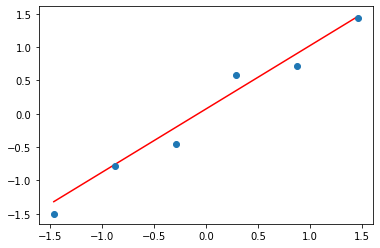

In [22]:
plt.plot(X, previsoes, color = 'red')
plt.plot(X, y, 'o')

In [23]:
scaler_x.transform([[40]])

array([[21.3722116]])

In [24]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform([[40]]))
previsao

array([[114.01348689]])

In [25]:
y1 = scaler_y.inverse_transform(y)
y1

array([[80.5],
       [81.6],
       [82.1],
       [83.7],
       [83.9],
       [85. ]])

In [26]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

array([[80.78147039],
       [81.63357338],
       [82.48567636],
       [83.33777935],
       [84.18988234],
       [85.04198532]])

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)

In [28]:
mae

0.23246807334921962

In [29]:
mse

0.07434955745940572